# Cat vs Non-cat Classifier - Introduction

# About the Project
In this project, We will build a cat vs non-cat classifier using logistic regression. We will only use numpy in this exercise. No other package like tensorflow or keras is used here. This serves as a good exercise for numpy.

We are given a set of images of cats and other animals.

# Cat vs Non-cat Classifier - Workflow
Let us have a look at the workflow for this project.
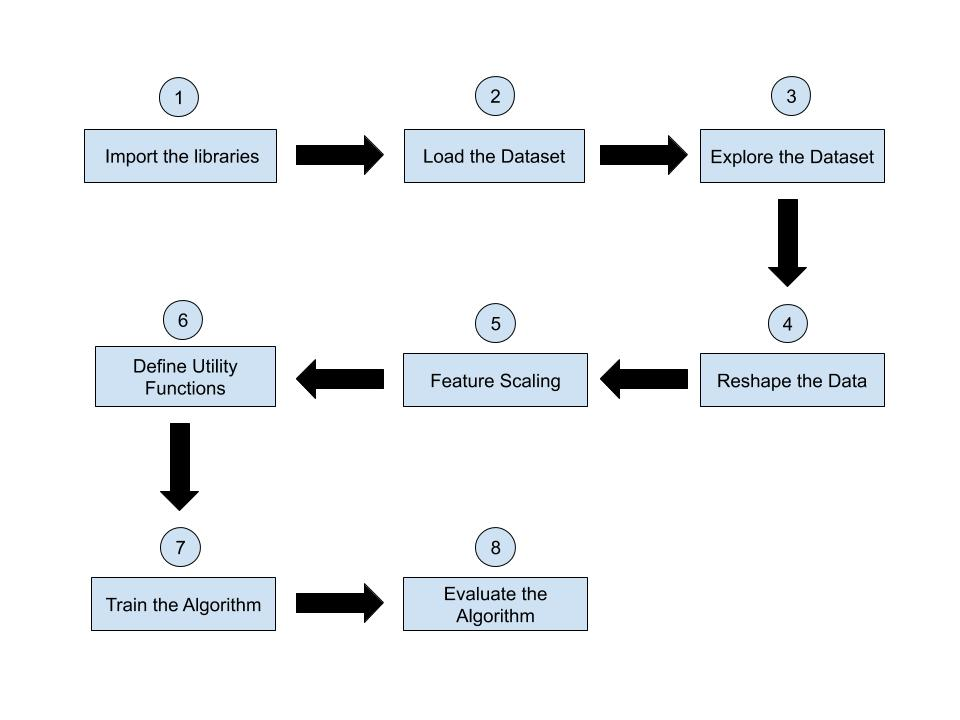

# Cat vs Non-cat Classifier - Import the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Cat vs Non-cat Classifier - Load the Dataset

About the Dataset
Dataset is located at /cxldata/datasets/project/cat-non-cat

Dataset is in .h5 file. It is a file format that could store the data - along with its meta-data - in the form of a hierarchy. Import h5py to interact with a dataset that is stored in an H5 file. It contains

train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)
test_catvnoncat.h5 - a test set of images labeled as cat or non-cat
Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px)
Now, let us load the dataset into our working session.

In [3]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")

test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


The train_dataset and test_dataset are HDF5 file objects. They have the data stored in a hierarchical format. Let us access the data and store it in form of numpy array as follows:

In [4]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

# Cat vs Non-cat Classifier - Split the data
We split the test data in order to use a part of it for validation purposes. After that, let us have a look at the shape of the train, validation, and test datasets.

Note:

**np.squeeze()** function is used when we want to remove single-dimensional entries from the shape of an array.

In [5]:
#Example
arr = np.arange(1,5)
print(arr)

[1 2 3 4]


In [6]:
arr = arr.reshape(1,2,2) #reshape it in the shape of (1,2,2) 
arr

array([[[1, 2],
        [3, 4]]])

In [7]:
#np.sqeeze to remove the one-dimensional entry to make it of shape (2,2)
arr_squeezed = np.squeeze(arr)
print(arr_squeezed)
print(arr_squeezed.shape)

[[1 2]
 [3 4]]
(2, 2)


The test data contains 50 samples. Let the first 25 samples form the validation data, while the rest 25 samples form the test data.

In [8]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x =test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",test_set_x.shape)

Validation data shape:  (25, 64, 64, 3)
Test data shape:  (25, 64, 64, 3)


In [9]:
train_set_y_orig

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
len(train_set_y_orig)

209

In [11]:
train_set_x_orig

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [12]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [13]:
train_set_y_orig.shape

(209,)

In [14]:
m_train = np.squeeze(train_set_y_orig.shape) 
m_val = np.squeeze(validation_y.shape)
m_test = np.squeeze(test_set_y.shape)
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_test = " + str(m_val))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of validation examples: m_test = 25
Number of testing examples: m_test = 25
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


Create a numpy array of shape (2,1,10) and containing values from 1 to 20. Now upon using np.squeeze on this array, what would be the shape of the squeezed array?

In [15]:
arr1 = np.arange(1,21)
print(arr1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [16]:
arr1 = arr1.reshape(2,1,10)
arr1

array([[[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]],

       [[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]])

In [17]:
np.squeeze(arr1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [18]:
np.squeeze(arr1).shape

(2, 10)

# Cat vs Non-cat Classifier - Visualize the Data
The classes of the images in the datasets are cat and non-cat. These labels of each sample are stored in train_set_y_orig, validation_y and test_set_y, where 1 means 'cat' and 0 means 'non-cat'. Let us see how to get this info Pythonically:

The following code gets the classes from the data set. We will be printing the classes, how the labels of the classes are stored in the data set. Then, we will be plotting the image.

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


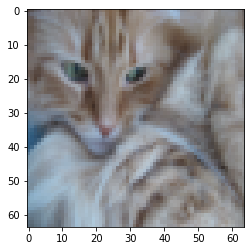

In [19]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [20]:
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [21]:
print("Validation_x data size: ", validation_x.shape)
print("Validation_y data size: ", validation_y.shape)

Validation_x data size:  (25, 64, 64, 3)
Validation_y data size:  (25,)


In [22]:
print("test_set_x shape: ", test_set_x.shape)
print("test_set_y shape: ", test_set_y.shape)

test_set_x shape:  (25, 64, 64, 3)
test_set_y shape:  (25,)


# Cat vs Non-cat Classifier - Reshaping the data
We need to reshape the data in a way compatible to be fed to our Machine Learning Algorithm - Logistic Regression Classifier.

Now, let us reshape the images to a flat vector of shape (height x width x 3, 1). This could be done by using reshape(train_set_x_orig.shape[0],-1).

-1 in reshape function is used when you don't want to explicitly tell the dimension of that axis.

E.g, here, we want each of the 209 samples in the train set to be represented as a single vector of shape (height x width x 3).

By writing train_set_x_orig.reshape(train_set_x_orig.shape[0], -1), the array will get reshaped in such a way that the resulting array has 209 rows and this is only possible by having (height x width x 3) columns, hence, (height x width x 3,209).

We then transpose the matrix by using train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

In [23]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
validation_x_flatten = validation_x.reshape(validation_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

In [24]:
print ("train_set_x_flatten shape: ", train_set_x_flatten.shape)
print ("train_set_y shape: ", train_set_y_orig.shape)

print ("validation_x_flatten shape: ", validation_x_flatten.shape)
print ("validation_y shape: ", validation_y.shape)

print ("test_set_x_flatten shape: ", test_set_x_flatten.shape)
print ("test_set_y shape: ", test_set_y.shape)

train_set_x_flatten shape:  (12288, 209)
train_set_y shape:  (209,)
validation_x_flatten shape:  (12288, 25)
validation_y shape:  (25,)
test_set_x_flatten shape:  (12288, 25)
test_set_y shape:  (25,)


# Cat vs Non-cat Classifier - Feature Scaling
The values of the pixels in RGB images range from 0 to 255.

So, we need to apply Scaling to these features values for our ML algorithms to work fine on them.

After scaling, all the values will be spread in the range of 0 to 1.

Note:

min() returns the minimum value of the NumPy array upon which it is called.

max() returns the maximum value of the NumPy array upon which it is called.

In [25]:
print("Original Min value: ",train_set_x_flatten.reshape(1,-1).min())
print("Original Max value: ",train_set_x_flatten.reshape(1,-1).max())

Original Min value:  0
Original Max value:  255


In [26]:
train_set_x = train_set_x_flatten / 255.
validation_set_x = validation_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [27]:
print("Standardized Min value: ",train_set_x.reshape(1,-1).min())
print("Standardized Max value: ",train_set_x.reshape(1,-1).max())

Standardized Min value:  0.0
Standardized Max value:  1.0


# Cat vs Non-cat Classifier - Defining some utility functions
As a workflow, we shall first define the helper functions to be used in our holistic algorithm.

We are going to define the following functions.

Sigmoid Function - calculates the sigmoid activation function

Initialize Weights - initializes the weights and bias values to zeros, upon which we update those values through optimization

Forward propagation - returns activations and cost

Backward propagation - returns the gradients(derivatives) of weights and bias

Propagate - implements the forward and backward propagation by calling the corresponding functions

Predict - predicts the labels

Get Accuracies - calculates the accuracies of predictions of the model

Optimize - gets the optimal weights and biases

Model - the main function to train the algorithm and get the final model for classification

## Cat vs Non-cat Classifier - Defining some utility functions - Sigmoid Function
As we know, we use sigmoid activation function in logistic regression to introduce non-linearity to the decision curve. All the negative extreme values will be squashed towards 0, while the positive extreme values will be squashed towards 1. The value of sigmoid(0) is 0.5.

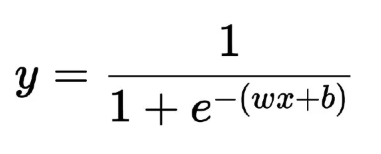enter image description here

Note:

np.exp() calculates the exponent value of each element of the input array.

np.linspace(a,b,n) returns a NumPy array with n equally spaced elements, and a and b are respectively the first and last elements in the resultant array.

In [28]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [29]:
z = np.linspace(-10,10,2000000)

In [30]:
sigmoid_z = sigmoid(z)

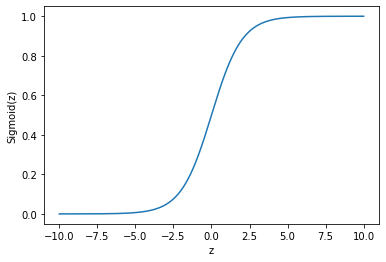

In [31]:
plt.plot(z, sigmoid_z) 
plt.xlabel("z") 
plt.ylabel("Sigmoid(z)") 
plt.show()

## Cat vs Non-cat Classifier - Defining some utility functions - Initializing Weights
The weights matrix should be of size (1,12288) so that the transpose matrix of the weights would be of shape (12288,1).

Since the shape of our dataset is (12288,209), it would satisfy the equation np.dot(w.T,X).

So, let us now aim to initialize our weight matrix with some random numbers and bias vector with 0s.

Note:

np.dot(a,b) calculates the dot product of the two vectors a and b.

np.random.seed(0) makes sure that the same set of random numbers are generated, no matter how many times the code is run.

Using np.random.rand, we could generate a matrix of any given shape filled with some random numbers ranging in [0, 1).

Eg, if we wish to create a 3-dimensional NumPy array containing random numbers and of shape (2,2,2), we could do that by:

In [32]:
random_3d_array = np.random.rand(2,2,2)
print(random_3d_array)

[[[0.05910838 0.2378723 ]
  [0.84381586 0.10110056]]

 [[0.01129107 0.49638352]
  [0.56815339 0.03631421]]]


In [33]:
#Create a weight matrix
def initialize_weights(dim):
    np.random.seed(0)
    w = np.random.rand(dim, 1)
    b = 0    
    return w, b

In [34]:
#example
dim = 2
w, b = initialize_weights(dim)

print("Weights: ",w)
print("Biases: ", b)

Weights:  [[0.5488135 ]
 [0.71518937]]
Biases:  0


## Cat vs Non-cat Classifier - Defining some utility functions - Forward Propagation
In forward propagation, we aim to calculate the activations and cost.

To calculate activations, we need to follow 2 steps for that:

Calculate the dot product of X and w.T, add then b.

Pass the above-obtained result to the sigmoid function.

To compute the cost, we:

Calculate the product of Y and np.log(A)
Calculate the product of (1-Y) and np.log(1-A)
Add the results of the above 2 steps.
Divide the negative of the result obtained in the third step with m, the total samples of the trainset.
Note:

np.log calculates the natural logarithm of all the elements in the array.

np.dot(a,b) calculates the dot product of the two vectors a and b.

np.sum(x) calculates the sum of elements in the input array.

In [35]:
x = [1,2,3]

In [36]:
x_log = np.log(x)

In [37]:
x_log

array([0.        , 0.69314718, 1.09861229])

In [38]:
a = np.array([[1,2],[3,4]]) 
b = np.array([[10,20],[30,40]]) 

c = np.dot(a,b)
print(c)

[[ 70 100]
 [150 220]]


In [39]:
ones_array = np.ones(shape=(4,4))

In [40]:
sum_of_ones_array = np.sum(ones_array)

In [41]:
sum_of_ones_array

16.0

In [42]:
#The forward_prop function below, calculates the activations A and the cross-entropy cost cost.
def forward_prop(w, b, X, Y):

    # calculate activations
    z = np.dot(w.T, X) + b
    A = sigmoid(z)

    # calculate cost
    m = X.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    cost = np.squeeze(cost)

    return A, cost

## Cat vs Non-cat Classifier - Defining some utility functions - Back Propagation
In backward propagation, we calculate the derivatives of weights and bias.

We compute the gradient of weights by:

calculating the dot product of X and (A-Y).T

dividing the result by m, the total number of samples in the dataset.

We compute the gradient of bias by:

calculating the np.sum(A-Y)

dividing the result by m, the total number of samples in the dataset.

Note:

np.dot(a,b) calculates the dot product of the two vectors a and b.

np.sum(x) calculates the sum of elements in the input array.

In [43]:
#The back_prop function below, calculates the gradients of w and b. 
def back_prop(X, A, Y):

    # calculate gradients for w,b
    m = X.shape[1]
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)

    grads = {'dw': dw, 'db': db}

    return grads

## Cat vs Non-cat Classifier - Defining some utility functions - Propagate
The forward and backward propagation are important steps to get the gradients and costs in the process of training our algorithm.

In the forward propagation, we calculate the dot product of the feature vector, ie X and the weights matrix, and then the resultant is added with the bias vector. Next, the sigmoid function is applied to get the activations and the cost is calculated.

In backward propagation, we calculate the gradients of the weights and bias matrices.

Let us use propagate function which calls both the forward_prop and back_prop functions.

In [44]:
#Call the forward_prop function and back_prop function the appropriate places of the below propagate function
def propagate(w, b, X, Y):

    #Forward propagation
    A, cost = forward_prop(w, b, X, Y)

    #Backward propagation
    grads = back_prop(X, A, Y)

    return grads, cost

In [45]:
#Example
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)

In [46]:
grads

{'dw': array([[0.99993216],
        [1.99980262]]),
 'db': 0.49993523062470574}

## Cat vs Non-cat Classifier - Defining some utility functions - Predict
This function predicts the labels of the dataset by calling the sigmoid function.

The prediction for a sample is given out as

1 if the sigmoid function returns a value greater than 0.5
0 if the sigmoid function returns a value lesser than 0.5

In [47]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    #Compute probability vector
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_prediction

## Cat vs Non-cat Classifier - Defining some utility functions - Get Accuracies
Let us now implement the function which calculates the accuracy. This function takes as arguments the predicted labels and the actuals of the corresponding dataset.

We do this in 2 steps:

Using np.abs(Y_predicted - Y_actual), we calculate the absolute difference between the actual labels and predicted labels.

Then, we use np.mean() and calculate accuracy.

Note:

np.abs gets the absolute value of each element in the input array.

np.mean returns the mean of the elements in the input array.

In [51]:
y_actual = np.array([1,1,1,0,1])
print("y_actual :", y_actual )

y_predicted = np.array([1,0,0,0,1])
print("y_predicted :", y_predicted )

y_actual : [1 1 1 0 1]
y_predicted : [1 0 0 0 1]


In [52]:
c = np.abs(y_actual - y_predicted)

In [53]:
c_mean = np.mean(c)

In [54]:
accuracy = 100 - (c_mean * 100)

In [61]:
def get_accuracies(Y_predicted, Y_actual):
    abs_diff = np.abs(Y_predicted - Y_actual)
    accuracy = 100 - np.mean(abs_diff) * 100
    return accuracy

## Cat vs Non-cat Classifier - Defining some utility functions - Optimize
The Optimize function:

implements both the forward and backward propagations by calling the propagate function for each iteration.

updates the weights and bias matrices based on the gradients received from the propagate function.

predicts the labels for train and test datasets by calling the predict function

calculates the accuracies

returns the parameter values that yield the optimal test accuracies.

In [68]:
#Call the propagate function, predict function and get_accuracies function at the appropriate places inside the optimize function.
def optimize(w, b, X, Y, X_val, Y_val, num_iterations, learning_rate):
    prev_train_acc=0
    prev_val_acc=0
    costs=[]
    epoch=0
    final_w = w
    final_b = b

    for i in range(num_iterations):

        # Call Propagate function to get Cost and gradients
        grads, cost = propagate(w, b, X, Y)
        costs.append(cost)

        # Get derivatives
        dw = grads['dw']
        db = grads['db']

        # Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Predict labels for train and validation sets        
        Y_prediction_train = predict(w, b, X)
        Y_prediction_val =  predict(w, b, X_val)

        # Get accuracies for the train and validation predictions
        train_acc =  get_accuracies(Y_prediction_train , Y)
        val_acc =  get_accuracies(Y_prediction_val, Y_val)

        if val_acc > prev_val_acc and train_acc>=val_acc:
            print("*****************************")
            print("Epoch - {} - train accuracy: {} %".format(i,train_acc))
            print("Epoch - {} - val accuracy: {} %".format(i,val_acc))
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            prev_train_acc = train_acc
            prev_val_acc = val_acc
            epoch = i
            final_w = w
            final_b = b

    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    optimal_values = {
        'costs': costs,
        'final w':final_w,
        'final b':final_b,
        'epoch':epoch,
        'Train accuracy':prev_train_acc,
        'Validation accuracy': prev_val_acc,
        'Y_prediction_val': Y_prediction_val,
        'Y_prediction_train': Y_prediction_train,
        'params':params,
        'grads':grads,
    }

    return optimal_values

## Cat vs Non-cat Classifier - Defining some utility functions - Model
The function model is the holistic function, which uses all the other helper functions to train the algorithm.

We are essentially creating models with different learning rates and pick the one which yields reasonable train and validation accuracies. We also parallelly take care that the model doesn't overfit, by making note of the epochs that yield reasonable results.

Finally, the best parameters are returned in the form of a dictionary containing the corresponding values.

In [75]:
#Call the initialize_weights function and optimize function at the appropriate places inside the model function.
def  model(X_train, Y_train, X_val, Y_val, num_iterations=2000, learning_rate=[0.5]):
    prev_train_acc=0
    prev_val_acc=0

    #  Initialize weights and bias 
    w, b = initialize_weights(X_train.shape[0])

    best_values = {
        'final w':w,
        'final b':b,
        'Train accuracy':prev_train_acc,
        'Validation accuracy': prev_val_acc,
     }


    for lr in learning_rate:
        print(("-"*30 + "learning_rate:{}"+"-"*30).format(lr))

        # Initialize weights and bias
        w, b = initialize_weights(X_train.shape[0])


        # Optimization
        lr_optimal_values = optimize(w, b, X_train, Y_train, X_val, Y_val, num_iterations, lr)
        if lr_optimal_values['Validation accuracy']>prev_val_acc:
            prev_val_acc = lr_optimal_values['Validation accuracy']
            prev_train_acc = lr_optimal_values['Train accuracy']
            final_lr = lr
            final_w = lr_optimal_values['final w']
            final_b = lr_optimal_values['final b']
            final_epoch = lr_optimal_values['epoch']
            final_Y_prediction_val = lr_optimal_values['Y_prediction_val']
            final_Y_prediction_train = lr_optimal_values['Y_prediction_train']

    best_values['Train accuracy'] = prev_train_acc
    best_values['Validation accuracy'] = prev_val_acc
    best_values['final_lr'] = final_lr
    best_values['final w'] = final_w
    best_values['final b'] = final_b
    best_values['epoch'] = final_epoch
    best_values['Y_prediction_val'] = final_Y_prediction_val
    best_values['Y_prediction_train'] = final_Y_prediction_train

    return best_values

In [80]:
best_values = model(train_set_x, train_set_y_orig, validation_set_x, validation_y, num_iterations = 2000, learning_rate = [0.1,0.0001,0.001,0.005])

------------------------------learning_rate:0.1------------------------------
*****************************
Epoch - 18 - train accuracy: 62.67942583732057 %
Epoch - 18 - val accuracy: 36.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


*****************************
Epoch - 20 - train accuracy: 62.20095693779905 %
Epoch - 20 - val accuracy: 48.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 22 - train accuracy: 62.20095693779905 %
Epoch - 22 - val accuracy: 60.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 63 - train accuracy: 74.16267942583733 %
Epoch - 63 - val accuracy: 72.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 68 - train accuracy: 76.55502392344498 %
Epoch - 68 - val accuracy: 76.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 156 - train accuracy: 87.5598086124402 %
Epoch - 156 - val accuracy: 80.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 194 - train accuracy: 84.68899521531101 %
Epoch - 194 - val accuracy: 84.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
------------------------------learning_rate:0.0001------------------------------
------------------------------learning_rate:0.

# Cat vs Non-cat Classifier - Evaluating the model on Test Data
The parameter values for the best model are returned in the form of a dictionary best_values by calling model function.

The train and validation accuracies seem reasonable enough, leaving the impression of just fit, but not overfit or underfit model.

Let us evaluate this implication by getting the predictions for our test set and calculating the test set accuracies.

In [84]:
Y_prediction_test = predict(best_values['final w'], best_values['final b'], test_set_x)

In [85]:
test_acc = get_accuracies(test_set_y, Y_prediction_test)
print("Test accuracy is: ",test_acc)

Test accuracy is:  80.0


In [86]:
print("Final best model:")
print("For Learning rate:" ,best_values['final_lr'], ", Epoch - ",best_values['epoch'])
print("Train accuracy: ", best_values['Train accuracy'])
print("Validation accuracy: ",best_values['Validation accuracy'])
print("Test accuracy is: ",test_acc)

Final best model:
For Learning rate: 0.1 , Epoch -  194
Train accuracy:  84.68899521531101
Validation accuracy:  84.0
Test accuracy is:  80.0


# Cat vs Non-cat Classifier - Example of Misclassified image
Let us just have a look at some of the correctly classified and misclassified samples by our model.

Note:

Write each of the 4 code blocks mentioned below in different code-cells of your jupyter notebook. This would help you understand and visualize better.

Predicted as: cat


1.0

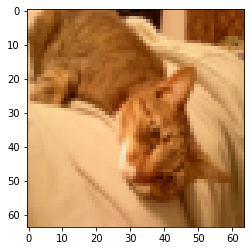

In [90]:
#Plot the image of a correctly classified cat image using matplotlib.
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,1].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][1]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

Predicted as: non-cat


0.0

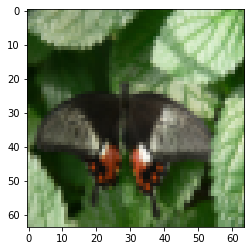

In [91]:
#Plot the image of a correctly classified non-cat image using matplotlib.
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,2].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][2]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

Predicted as: non-cat


0.0

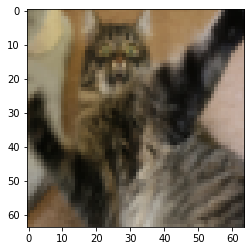

In [92]:
#Plot the image of an incorrectly classified cat image using matplotlib.
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,3].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][3]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

Predicted as: cat


1.0

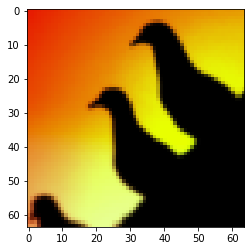

In [93]:
#Plot the image of an incorrectly classified non-cat image using matplotlib.
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,4].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][4]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value